In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
%matplotlib inline

In [8]:
df = pd.read_csv('New_Forest_Fire_Cleaned.csv')

In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


KeyError: "['day', 'month', 'year'] not found in axis"

In [58]:
##Encoding
df['Classes']= np.where(df['Classes'].str.contains("not fire"),0,1)

AttributeError: Can only use .str accessor with string values!

In [60]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [62]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [64]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [66]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [68]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25 , random_state = 42)

In [75]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


plt.figure(figsize=(12,10))
corr = X_train.corr()
sbs.heatmap(corr,annot=True)

In [83]:
def corelation (dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [195]:
##threshhold -- domain expertise
# corr_features = corelation(X_train , 0.85)
corr_features = corelation(X_test , 0.85)

In [197]:
 ##drop highly corelated features

In [199]:
# X_train.drop(corr_features,axis=1,inplace = True)
X_test.drop(corr_features,axis=1,inplace=True)

In [201]:
X_train.shape
X_test.shape
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1


##Standerd Scaler

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model trainning

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score

In [238]:
lenreg = LinearRegression()
lenreg.fit(X_test_scaled,y_test)

LinearRegression()

In [240]:
y_pred = lenreg.predict(X_train_scaled)

6.063081879970883
-0.2280638758618272


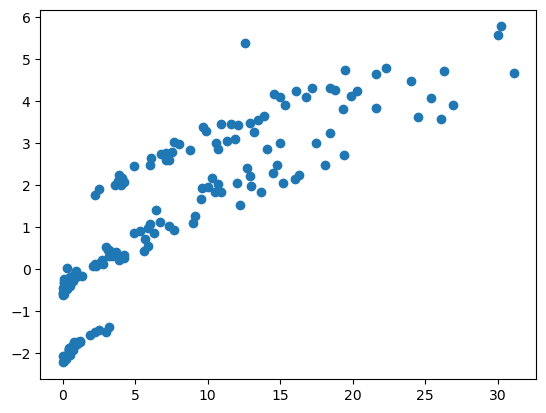

In [248]:
mae = mean_absolute_error(y_train,y_pred)
score = r2_score(y_train,y_pred)
print(mae)
print(score)
plt.scatter(y_train,y_pred)

##Lasso Regression

In [261]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error , r2_score

In [263]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)

Lasso()

In [265]:
y_pred = lasso.predict(X_test_scaled)

In [274]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error , r2_score

32.50615511500551
-42.837422257063885


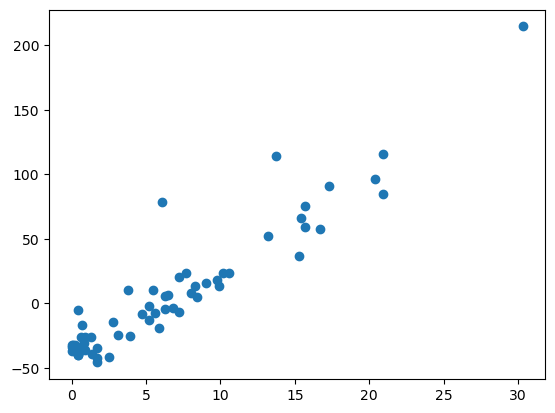

In [282]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

In [284]:
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)

Ridge()

In [278]:
y_pred = ridge.predict(X_test_scaled)

32.50615511500551
-42.837422257063885


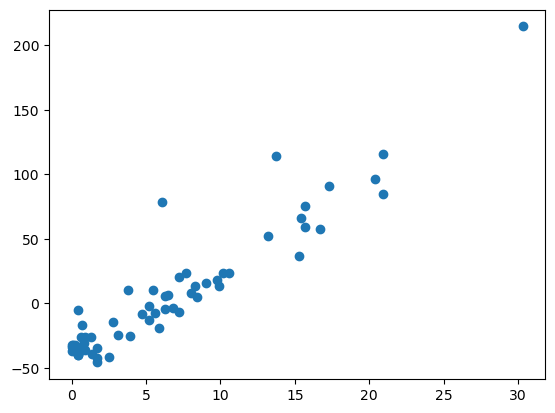

In [280]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

##ElasticNet

In [287]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error , r2_score

In [ ]:
ridge = E()
ridge.fit(X_train_scaled,y_train)